In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
matplotlib.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv("all_data_modeling.csv", index_col=0)
print(df.shape)
df.head(2)

(178, 39)


,zipcode,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,...,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,10001,-0.000007,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,-0.173469,...,-0.180106,-0.833415,-0.169423,-0.000070,-1.376286,12.446914,0.533825,0.117905,0.050109,0.037876
1,10002,0.000002,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,-0.071429,...,-0.034884,0.027568,-0.040357,0.006078,2.194057,10.818387,0.473819,0.128549,0.055533,0.048182


In [3]:
X = df.iloc[:,1:-5]
X = preprocessing.scale(X)
X = pd.DataFrame(X)
X.columns = df.columns[1:-5]
X.head(2)

,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,robbery_change_rate,SS_change_rate,...,N_change_area,T_change_area,PHS_change_area,VP_change_area,MasterCard_growth_rank,pv_change_area,sub_change_area,taxi_change_area,fhv_change_area,log_fhv_taxi_change
0,-1.396688,-8.666551,-0.175734,-2.321053,-9.920944,-0.401002,-0.631482,-1.199891,0.008548,-0.594625,...,0.159436,-0.428917,0.385515,-1.172368,-0.529761,-1.592621,-1.362524,-2.498763,-0.328604,-2.487248
1,0.843619,0.142710,0.210559,0.635045,0.079989,0.514496,0.125442,-0.084254,0.320555,-0.039947,...,1.824403,-1.080355,0.057601,-0.621903,1.347804,-0.367858,0.088704,-0.290767,-0.243906,0.221327


In [5]:
Ygroup = df.iloc[:,-5:]
Ygroup = preprocessing.scale(Ygroup)
Ygroup = pd.DataFrame(Ygroup)
Ygroup.columns = df.columns[-5:]
Ygroup.head(2)

,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp
0,-0.858855,0.019509,-1.032780,-0.780443,-0.956476
1,-0.973871,-0.410923,-0.888257,-0.727130,-0.819385


In [6]:
def cross_validate(clf, param_grid):
    from sklearn.model_selection import GridSearchCV
    
    clf_=GridSearchCV(clf,param_grid=param_grid,verbose=1)
    rs=clf_.fit(X_train,y_train)
    return rs.best_params_

renovation_index_with_rent
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    3.7s finished


{'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 2}
In sample accuracy: 0.5745366087487114
Out of sample accuracy: 0.164258187656265


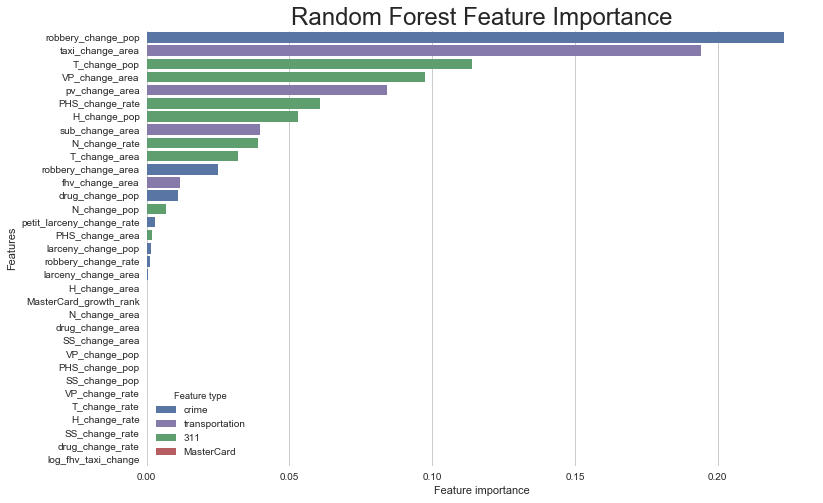

business_renewal
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    4.1s finished


{'max_depth': 2, 'max_features': 15, 'min_samples_leaf': 3}
In sample accuracy: 0.6190660343597483
Out of sample accuracy: 0.3516732399539939


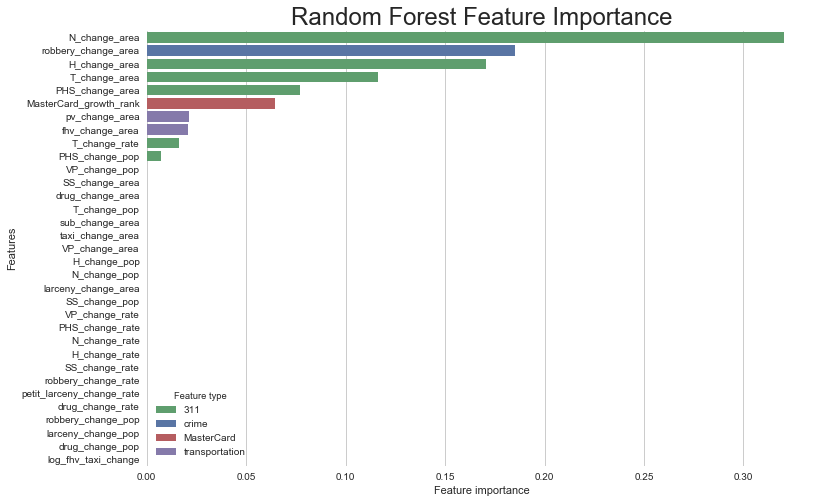

rent_increase
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    3.9s finished


{'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 2}
In sample accuracy: 0.48129062246174337
Out of sample accuracy: 0.04300053175093621


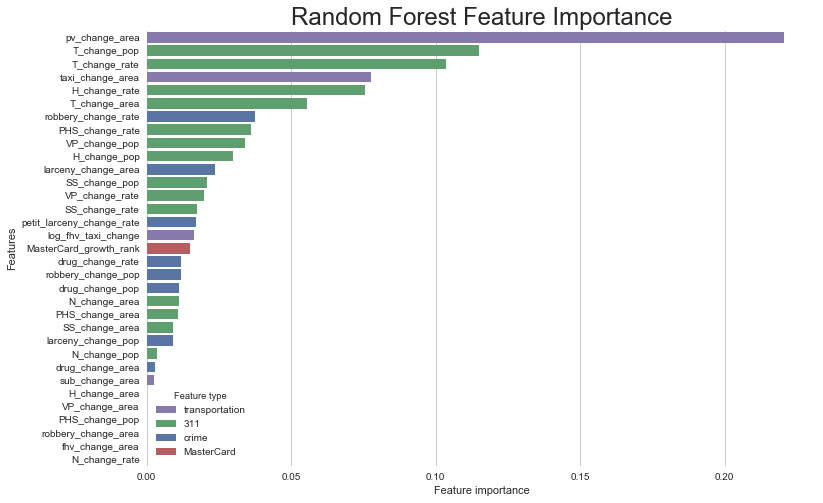

new_building_tbp
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    4.5s finished


{'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 2}
In sample accuracy: 0.6690513602224542
Out of sample accuracy: 0.18649526752397794


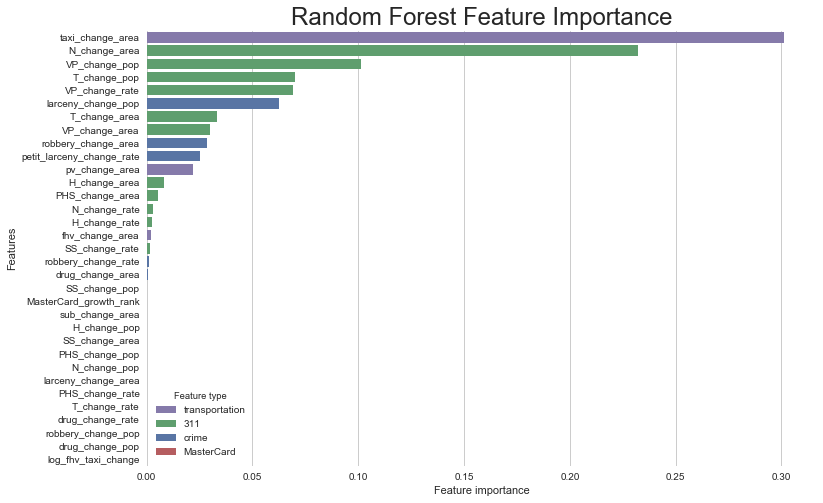

major_renovation_tbp
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    3.9s finished


{'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 4}
In sample accuracy: 0.6856998771408305
Out of sample accuracy: 0.23957382592058296


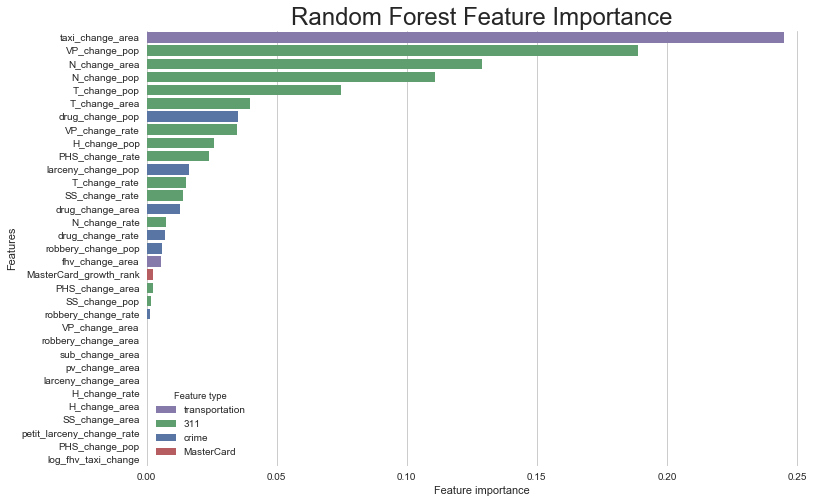

In [11]:
for i in range(5):
    print(Ygroup.columns[i])
    X_train, X_test, y_train, y_test = train_test_split(
        X, Ygroup.iloc[:,i], test_size = 0.3, random_state = 0)
    
    est=RandomForestRegressor(random_state = 888)
    est.fit(X_train,y_train)
    
    param_grid = {'max_depth':range(1,4),
                  'min_samples_leaf':range(2,5),
                  'max_features':range(5,17)}
    best_param = cross_validate(est, param_grid)
    print(best_param)
    
    est=RandomForestRegressor(random_state = 888, 
                              max_depth = best_param['max_depth'], 
                              min_samples_leaf = best_param['min_samples_leaf'])
    est.fit(X_train,y_train)
    
    
    print ('In sample accuracy: {}'.format(est.score(X_train,y_train)))
    print ('Out of sample accuracy: {}'.format(est.score(X_test,y_test)))
        
    #Random Forest Feature Importance
    d = {'Features': np.asarray(X.columns), 
         'Feature importance': np.asarray(est.feature_importances_),
         'Feature type': ['crime','crime','crime','crime','crime','crime',
                     'crime','crime','crime','311','311','311','311',
                     '311','311','311','311','311','311','311','311',
                     '311','311','311','311','311','311','MasterCard',
                     'transportation','transportation','transportation',
                          'transportation','transportation']}
    df = pd.DataFrame(data=d)
    df.sort_values(by='Feature importance', ascending=False, inplace=True)
    
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(12, 8))
    sns.set_color_codes("muted")
    palette ={"crime":"C0", "311":"C1", "MasterCard":"C2", "transportation":"C3"}
    sns.barplot(x="Feature importance", y="Features", data=df, 
                hue="Feature type", dodge=False, palette=palette)

    sns.despine(left=True, bottom=True)
    #plt.savefig('featurerank', dpi=500, transparent=False, bbox_inches='tight')
    plt.title("Random Forest Feature Importance", fontsize=24)
    plt.show()
    
    print("=====================")

# Gradient Boosting

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

renovation_index_with_rent
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=1)]: Done 23040 out of 23040 | elapsed: 16.0min finished


{'learning_rate': 0.2, 'loss': 'lad', 'max_depth': 2, 'max_features': 8, 'n_estimators': 109}
In sample accuracy: 0.6075627832909946
Out of sample accuracy: 0.17380441182583317


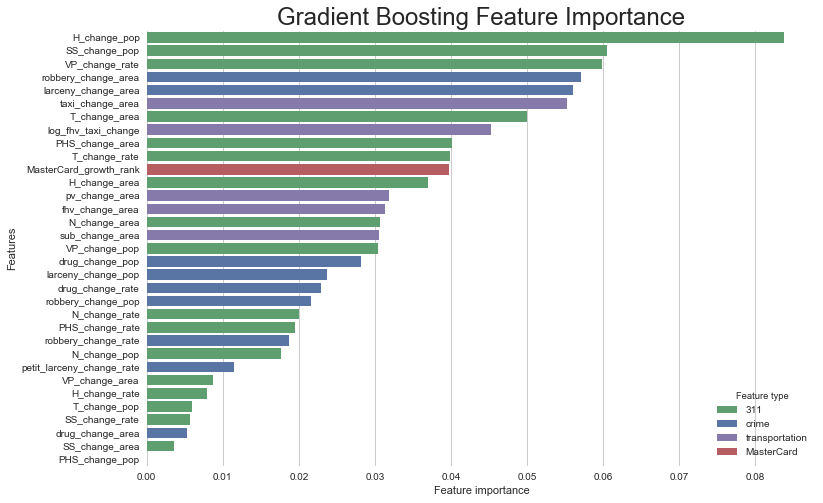

business_renewal
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=1)]: Done 23040 out of 23040 | elapsed: 15.4min finished


{'learning_rate': 0.2, 'loss': 'lad', 'max_depth': 2, 'max_features': 11, 'n_estimators': 103}
In sample accuracy: 0.7935983522171416
Out of sample accuracy: 0.4539710465242749


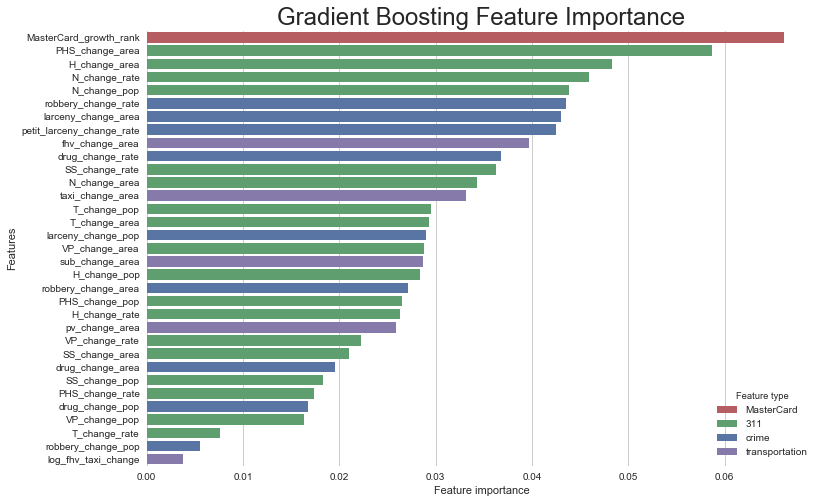

rent_increase
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=1)]: Done 23040 out of 23040 | elapsed: 16.2min finished


{'learning_rate': 0.2, 'loss': 'lad', 'max_depth': 2, 'max_features': 5, 'n_estimators': 90}
In sample accuracy: 0.5480765100246283
Out of sample accuracy: 0.11347094916008826


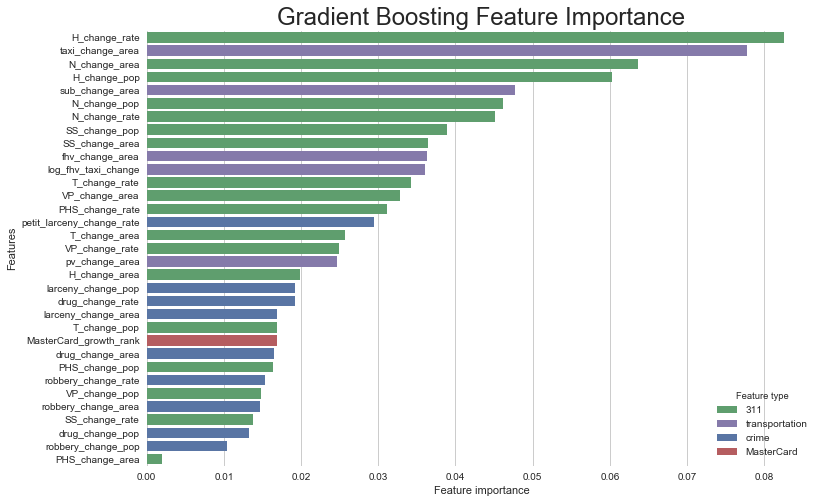

new_building_tbp
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=1)]: Done 23040 out of 23040 | elapsed: 15.4min finished


{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'max_features': 7, 'n_estimators': 92}
In sample accuracy: 0.9381403088380025
Out of sample accuracy: 0.1667681484049962


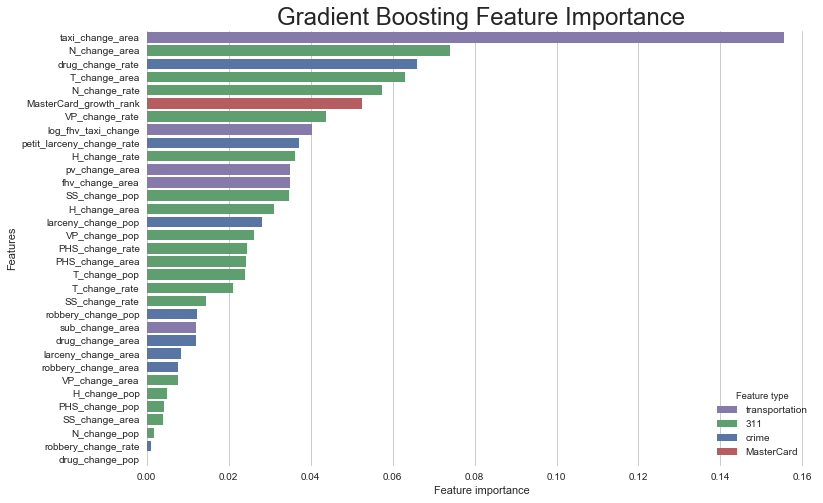

major_renovation_tbp
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits


[Parallel(n_jobs=1)]: Done 23040 out of 23040 | elapsed: 15.1min finished


{'learning_rate': 0.15000000000000002, 'loss': 'huber', 'max_depth': 2, 'max_features': 8, 'n_estimators': 109}
In sample accuracy: 0.9767025559743387
Out of sample accuracy: 0.3788208216899116


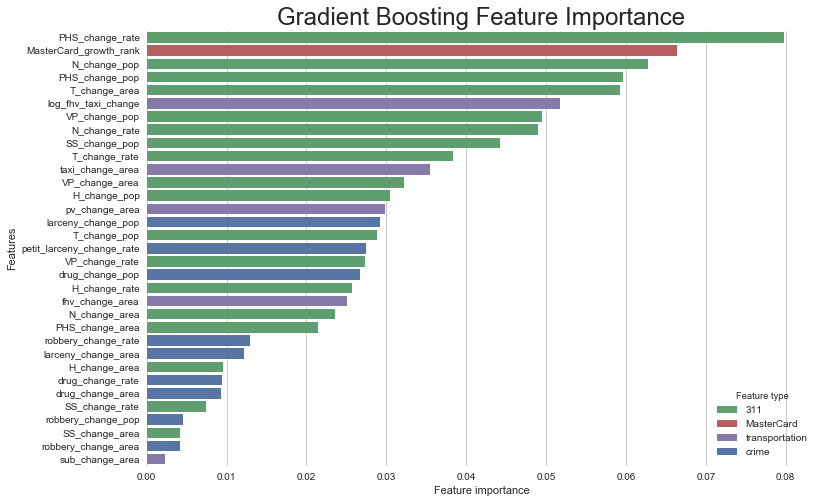

In [9]:
for i in range(5):
    print(Ygroup.columns[i])
    X_train, X_test, y_train, y_test = train_test_split(
        X, Ygroup.iloc[:,i], test_size = 0.3, random_state = 0)
    
    est = GradientBoostingRegressor(random_state=0)
    
    param_grid = {'n_estimators':range(90,110),
                  'learning_rate':np.arange(0.05,0.2,0.05),
                  'max_depth':range(1,3),
                  'loss':['ls', 'lad', 'huber', 'quantile'],
                  'max_features':range(5,17)}
    best_param = cross_validate(est, param_grid)
    print(best_param)
    
    est = GradientBoostingRegressor(random_state=0,
                                    n_estimators=best_param['n_estimators'],
                                    learning_rate=best_param['learning_rate'],
                                    max_depth=best_param['max_depth'],
                                    loss=best_param['loss'],).fit(X_train, y_train)
    
    print ('In sample accuracy: {}'.format(est.score(X_train,y_train)))
    print ('Out of sample accuracy: {}'.format(est.score(X_test,y_test)))
     
    d = {'Features': np.asarray(X.columns), 
         'Feature importance': np.asarray(est.feature_importances_),
         'Feature type': ['crime','crime','crime','crime','crime','crime',
                     'crime','crime','crime','311','311','311','311',
                     '311','311','311','311','311','311','311','311',
                     '311','311','311','311','311','311','MasterCard',
                     'transportation','transportation','transportation',
                          'transportation','transportation']}
    df = pd.DataFrame(data=d)
    df.sort_values(by='Feature importance', ascending=False, inplace=True)
    
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(12, 8))
    sns.set_color_codes("muted")
    palette ={"crime":"C0", "311":"C1", "MasterCard":"C2", "transportation":"C3"}
    sns.barplot(x="Feature importance", y="Features", data=df, hue="Feature type", dodge=False, palette=palette)

    sns.despine(left=True, bottom=True)
    #plt.savefig('featurerank', dpi=500, transparent=False, bbox_inches='tight')
    plt.title("Gradient Boosting Feature Importance", fontsize=24)
    plt.show()
    
    print("=====================")